## Exercise 17: Oracle for Grover’s algorithm with any target state
1. Write a function that generates an oracle to mark any given target state (e.g., |x = 110⟩) in a 3-qubit system.
2. Implement Grover’s algorithm to find this state.

Expected Outcome: The result should show the highest probability for the state |110⟩.

[Hints:] Use X gates to flip the necessary qubits for any desired target state. The function should take the desired state as input (e.g., 110) and automatically apply the necessary X gates before using a Toffoli gate.

In [47]:
from qiskit import *
from qiskit.primitives import StatevectorSampler  
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector
from numpy import sqrt
import numpy as np
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from qiskit_aer import AerSimulator
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

In [48]:
target_state = '111'

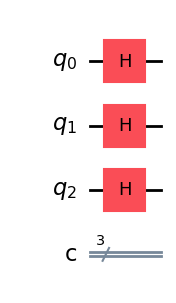

In [49]:
qc = QuantumCircuit(3, 3) 
    
qc.h(range(3))

qc.draw('mpl')

Initial State Vector (in LaTeX notation): 


<IPython.core.display.Latex object>


Initial State Vector (on Q-sphere Sphere):


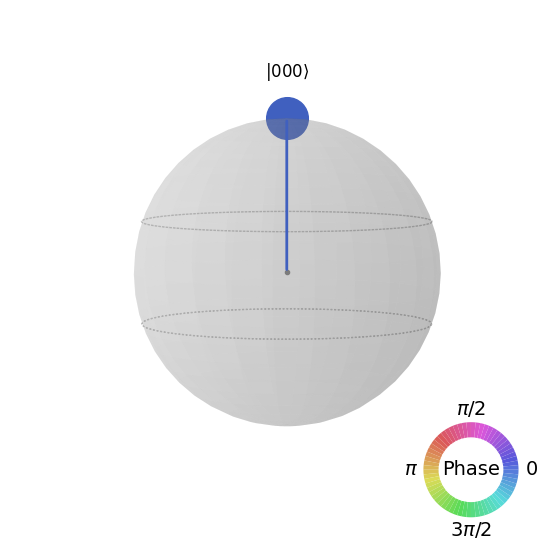


Initial State Vector (on Bloch Sphere):  


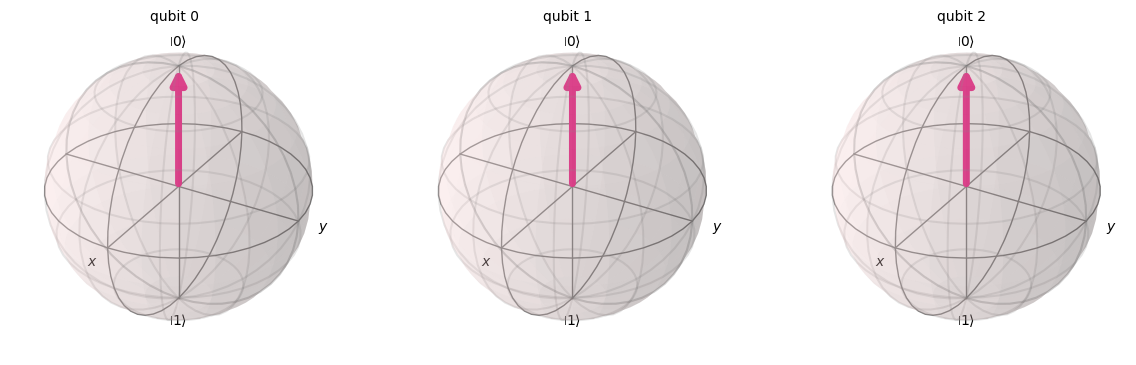

In [50]:
u_init = Statevector.from_label('000')
print("\033[1mInitial State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_init.draw('latex'))

print("\n\033[1mInitial State Vector (on Q-sphere Sphere):\033[0m".ljust(50))
display(u_init.draw('qsphere'))

print("\n\033[1mInitial State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_init.draw('bloch'))


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


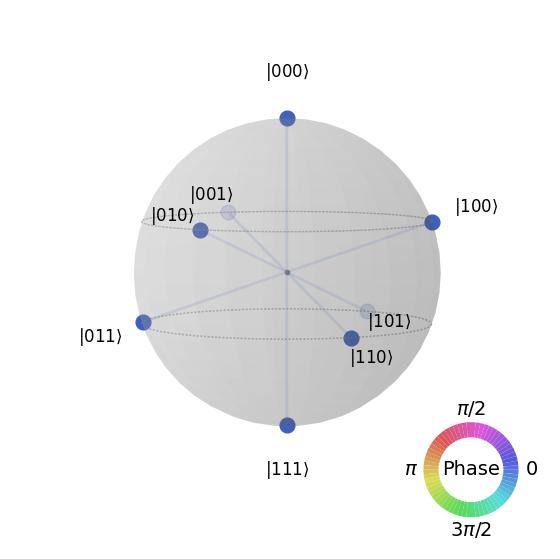


Resulting State Vector (on Bloch Sphere):


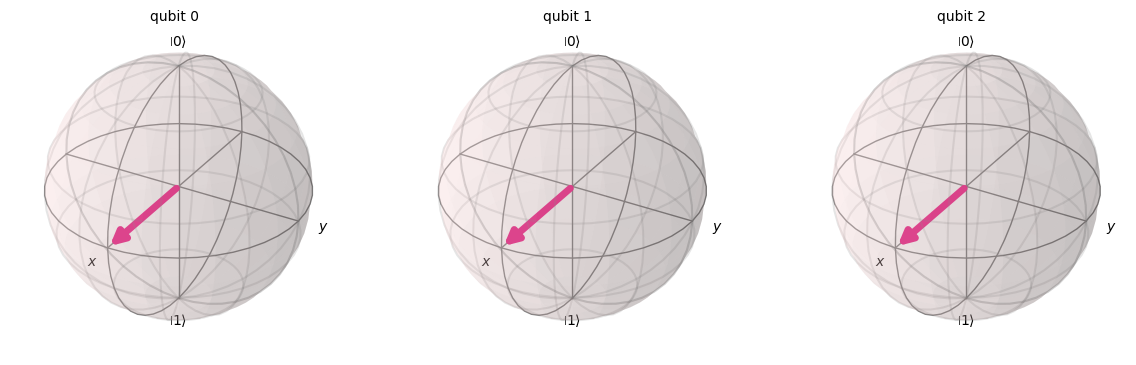

In [51]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

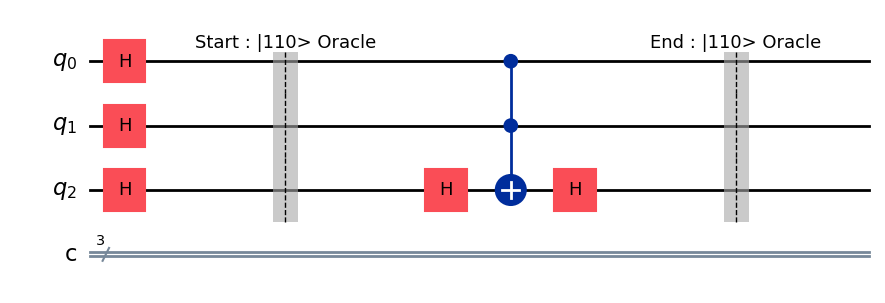

In [52]:
qc.barrier(label="Start : |110> Oracle")  # Label for the Oracle part
# Step 2: Implement oracle for target state
# Function to determine which qubits need to be flipped

# No need to flip qubits as the target state is |111>
# Apply the controlled-Z operation to mark the |111> state
qc.h(2)
qc.mcx(list(range(2)), 2)  # Multi-controlled-X to act on |111>
qc.h(2)

# Label the end of the oracle
qc.barrier(label="End : |110> Oracle") # Label for end of Oracle
qc.draw('mpl')


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


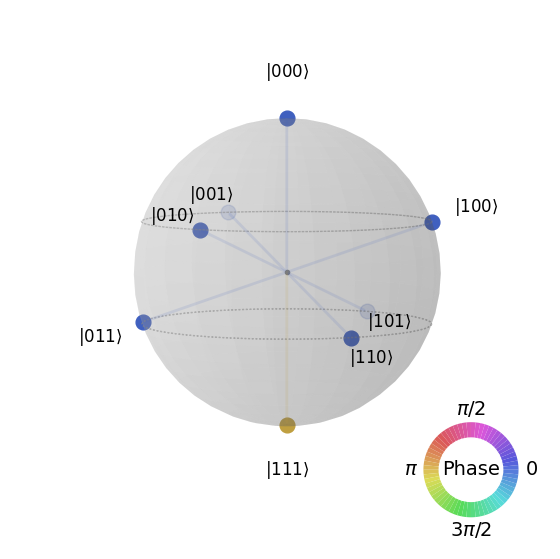


Resulting State Vector (on Bloch Sphere):


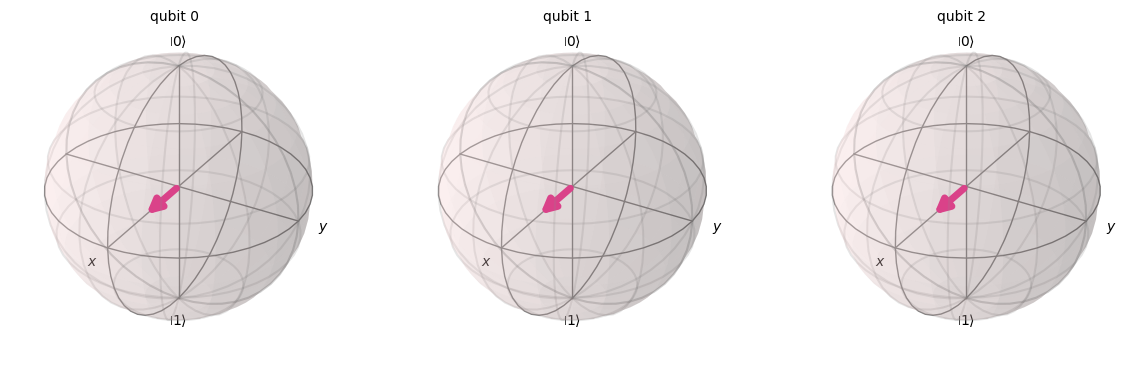

In [53]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

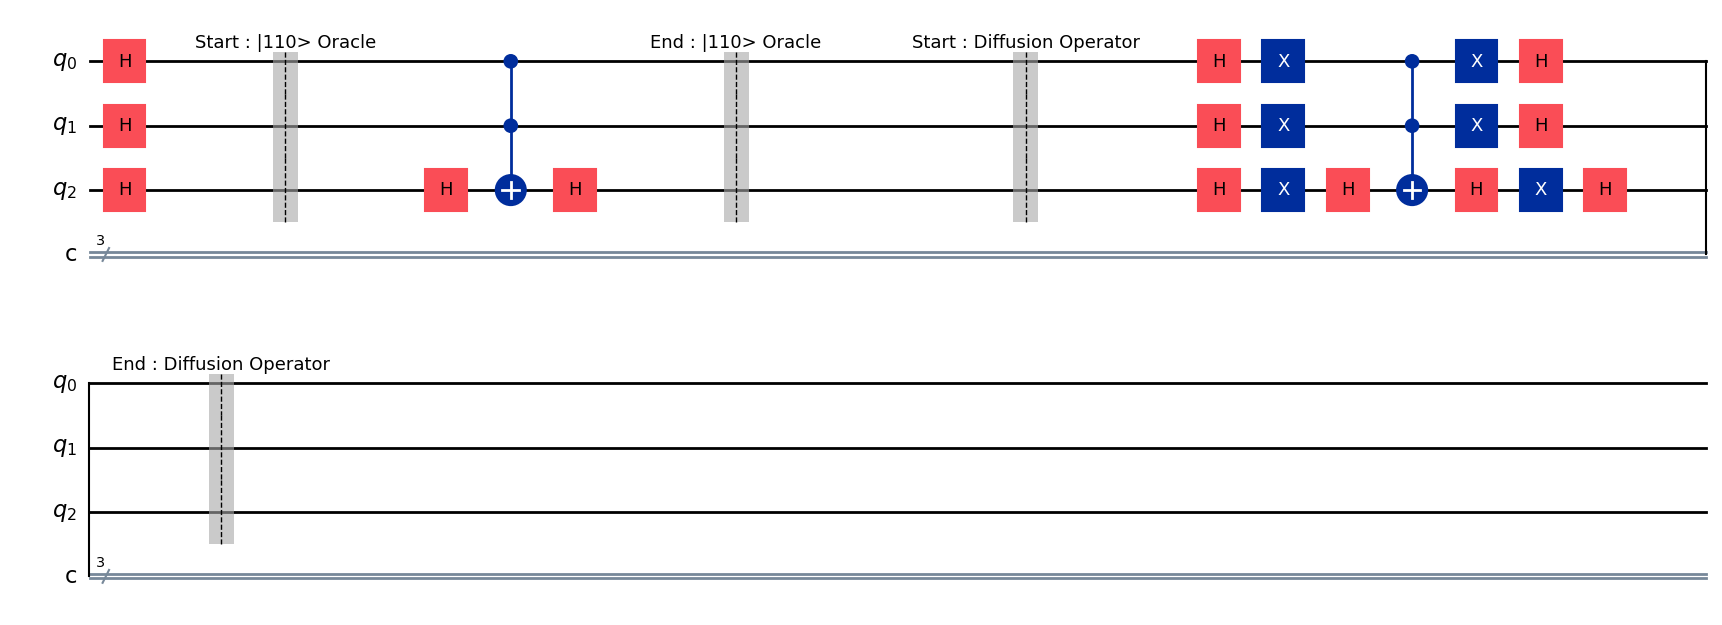

In [54]:
qc.barrier(label="Start : Diffusion Operator")
# Step 3: Implement diffusion operator
# Hadamard gates
for qubit in range(3):
    qc.h(qubit)

# Flip about zero state
for qubit in range(3):
    qc.x(qubit)

# Apply controlled-Z
qc.h(2)
qc.mcx(list(range(2)), 2)
qc.h(2)

# Restore qubits
for qubit in range(3):
    qc.x(qubit)

# Final Hadamard gates
for qubit in range(3):
    qc.h(qubit)
qc.barrier(label="End : Diffusion Operator")

qc.draw('mpl')


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


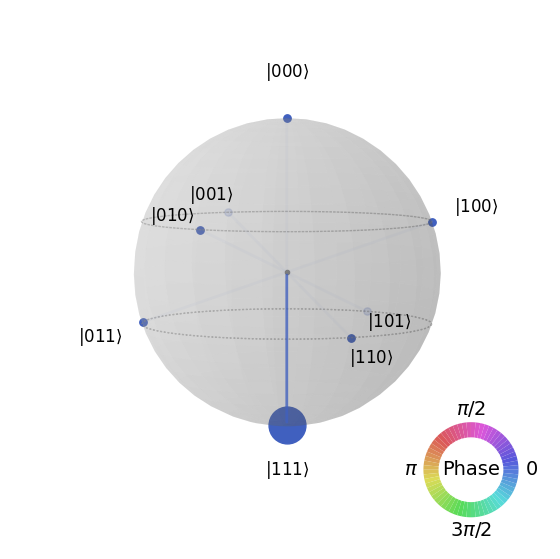


Resulting State Vector (on Bloch Sphere):


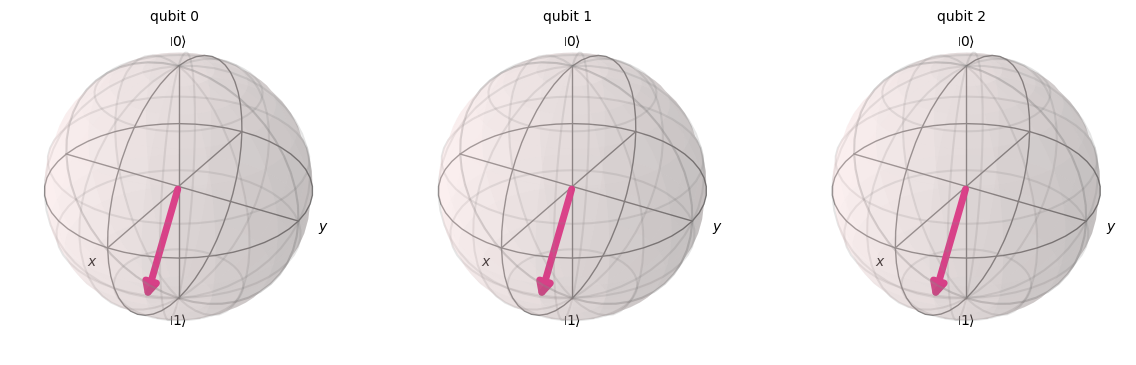

In [55]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

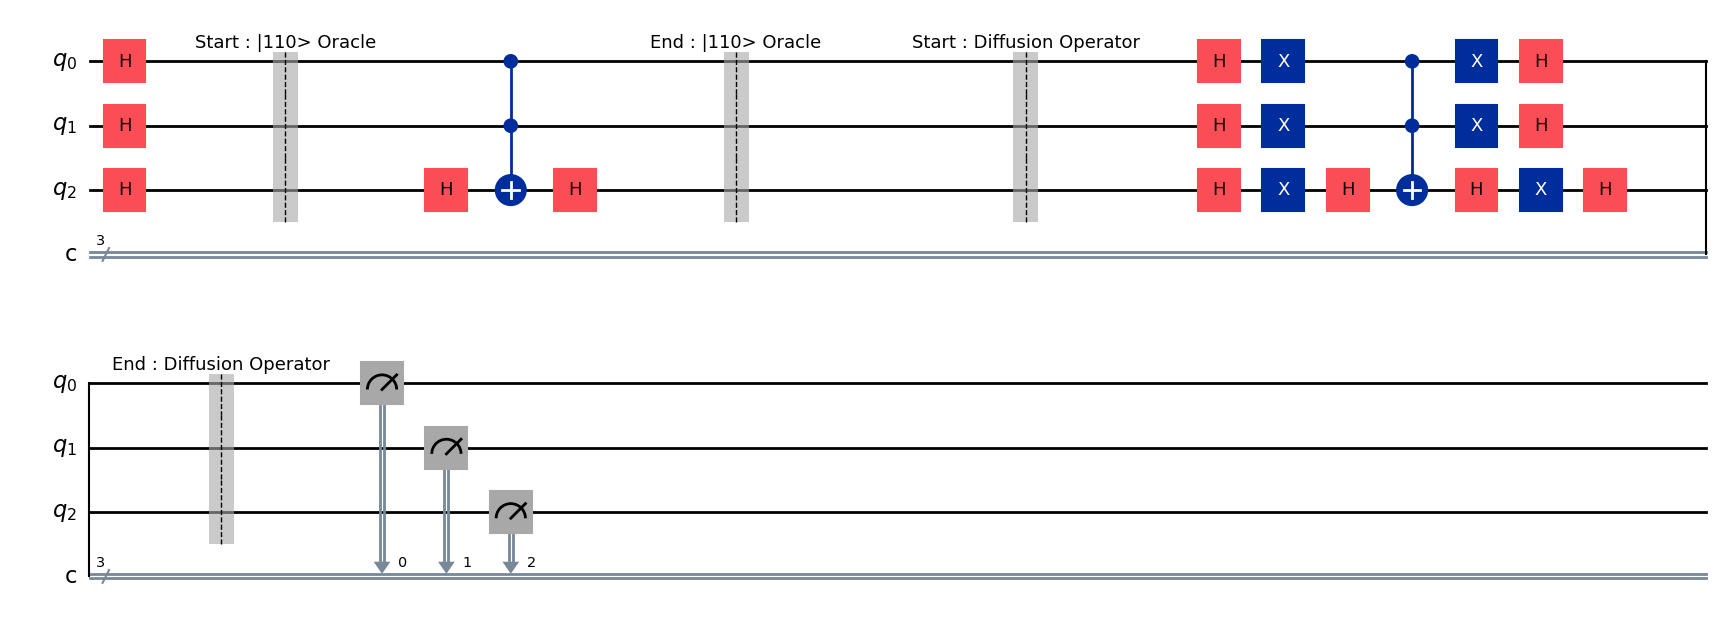

In [56]:
qc.measure(range(3), range(3))

qc.draw('mpl')

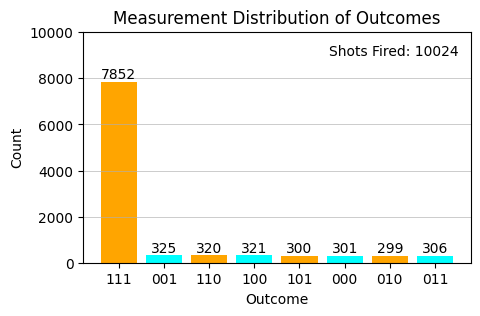

In [57]:
shots = 10024
result = AerSimulator().run(qc, shots=shots, memory=True).result()
counts = result.get_counts()

categories = list(counts.keys())
values = list(counts.values())

fig, axs = plt.subplots(1, 1, figsize=(5, 3))

bars0 = axs.bar(categories, values, color=['orange', 'cyan'])
axs.set_xlabel('Outcome')
axs.set_ylabel('Count')
axs.set_title('Measurement Distribution of Outcomes')
axs.grid(True,  axis='y', linestyle='-', linewidth=0.5, alpha=0.9)
axs.set_ylim(0, shots)
for bar in bars0:
    yval = bar.get_height()
    axs.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

custom_legend = [
    mpatches.Patch(color='none', label=f'Shots Fired: {shots}')
]
axs.legend(handles=custom_legend, frameon=False)